# Run-Workouts Data

In [1]:
import datetime as dt

In [2]:
import pathlib

In [3]:
import pandas as pd

In [4]:
home = pathlib.Path.home()

In [5]:
date_partition = "20200918"

In [6]:
data_input_path = f"{home}/small-data/apple-health-csv/full-extract/{date_partition}"

In [7]:
study_path = f"{home}/small-data/study/health-data/{date_partition}"

In [8]:
pathlib.Path(study_path).mkdir(parents=True,exist_ok=True)

In [9]:
workout = pd.read_csv(f"{data_input_path}/workout.csv",parse_dates=['startDate'], infer_datetime_format=True)

## Extract Runs From Workout Data

In [10]:
data_date_upperbound = dt.datetime.strptime(date_partition, "%Y%m%d").astimezone() #  use local time zone

In [11]:
runs = workout.loc[(workout['workoutActivityType'] == 'HKWorkoutActivityTypeRunning') & 
                   (workout['startDate'] < data_date_upperbound), 
                   ['totalDistance', 'startDate',  'HKIndoorWorkout']]

In [12]:
runs.loc[:,'HKIndoorWorkout'] = runs['HKIndoorWorkout'].apply(lambda x: True if x == 1.0 else False)

In [13]:
runs = runs.rename(columns={
    'startDate': 'start_date',
    'totalDistance': 'miles',
    'HKIndoorWorkout': 'indoor_run'
})
                  

In [14]:
runs['year'] = runs['start_date'].map(lambda x: x.year)

## Annual Run Statistics

In [15]:
runstats = runs.groupby(by=runs['year']).sum()

In [16]:
runstats # show table data

,miles,indoor_run
year,,
2018,14.698636,3
2019,416.403220,130
2020,688.403703,35


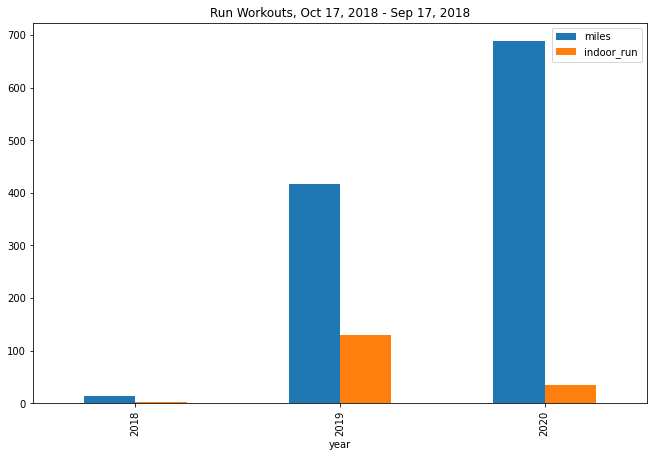

In [17]:
runstats_bp = runstats.plot.bar(y=['miles', 'indoor_run'], title='Run Workouts, Oct 17, 2018 - Sep 17, 2018', figsize=(11, 7))

In [18]:
runstats_bp.get_figure().savefig(f"{study_path}/annual_runs_distance")

### Annual Minimum 5K Runs

In [19]:
runs_5k_min = runs.loc[runs['miles'] >= 3.10]

In [20]:
runs_5k_min_by_year = runs_5k_min.groupby('year').count()

In [21]:
runs_5k_min_by_year

,miles,start_date,indoor_run
year,,,
2018,1,1,1
2019,55,55,55
2020,117,117,117


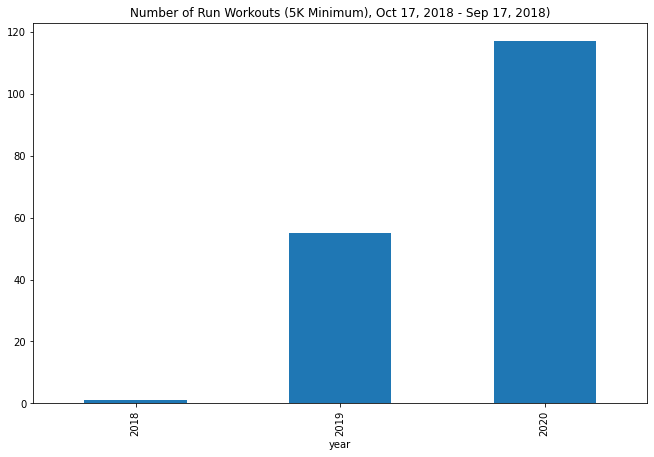

In [22]:
runstats_5k_min_bp = runs_5k_min_by_year.plot.bar(y='miles', legend=False, title='Number of Run Workouts (5K Minimum), Oct 17, 2018 - Sep 17, 2018)', figsize=(11, 7))

In [23]:
runstats_5k_min_bp.get_figure().savefig(f"{study_path}/annual_runs_5k_min")

## Annual Minimum 10K Runs

In [24]:
runs_10k_min = runs.loc[runs['miles'] >= 6.20]

In [25]:
runs_10k_min_by_year = runs_10k_min.groupby('year').count()

In [26]:
runs_10k_min_by_year

,miles,start_date,indoor_run
year,,,
2019,4,4,4
2020,27,27,27


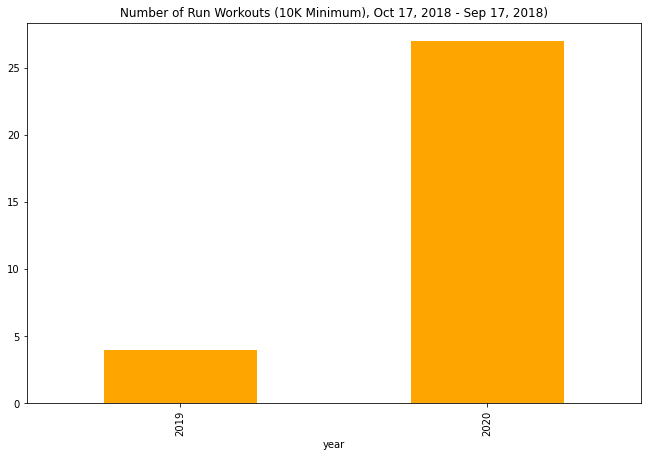

In [27]:
runstats_10k_min_bp = runs_10k_min_by_year.plot.bar(y='miles', color='orange', legend=False, title='Number of Run Workouts (10K Minimum), Oct 17, 2018 - Sep 17, 2018)', figsize=(11, 7))

In [28]:
runstats_10k_min_bp.get_figure().savefig(f"{study_path}/annual_runs_10k_min")